In [1]:
class InErr(Exception):
    def __init__(self, actual_size ):
        self.desired = actual_size
        
    def __str__(self):
        return "The desired size is "+str(self.desired)+" and the received size is "+str(self.got) 
    
    def gotval(self,got):
        self.got = got

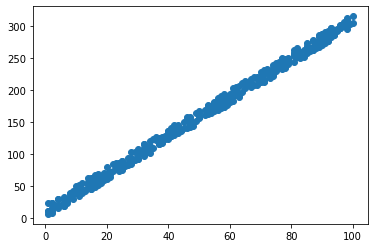

In [18]:
import numpy as np
import matplotlib.pyplot as plt
npts = 400
ls = list(range(1,101))
x = np.random.choice( ls, size=npts )
y = 3*x + np.random.uniform(low=0,high=20,size=x.shape[0])
sc = plt.scatter(x,y)
data = np.vstack((x,y)).T
mean0d = np.empty_like( data )
mean0d[:,0] = data[:,0] - data[:,0].mean()
mean0d[:,1] = data[:,1] - data[:,1].mean()
mean_alld = (data - data.mean())/data.max() 

fit_data1 = np.array([[-1.76586391869932,-0.91392532736063],
[-1.38289715070277,-0.502829586621374],
[-0.618779826909304,-0.408257109113038],
[-0.279251442290843,-0.469211537856609],
[-0.617764072492719,-0.565175158903003],
[-1.67860568827018,-0.845086738467216],
[-0.611263827420771,-0.0395743944682181],
[0.296234296169132,-0.65233340440318],
[-0.81200323626399,0.160686868242919],
[0.851336521562189,0.182786221150309]], dtype=np.double)

fit_data2 = np.array([[0.82154324837029,1.02822455205023,0.816867631161585,1.43172957585193,-0.211356920888647],
[0.158811071654782,0.477836100151762,0.628777307458222,0.468563350616023,0.15094120730646],
[0.267525406787172,0.853766672546044,1.29445294477046,0.975737085798755,0.440686272224411],
[0.522608259925619,0.845700737321749,0.67850524187088,0.878021024400368,-0.167195495450869],
[0.219620030373335,1.16526521905325,1.63568942062557,0.909664262318984,0.470424201572314],
[0.673377133207396,1.19049952598289,1.30780894239433,1.46406368282624,0.117309416411445],
[0.892852986464277,1.47818981576711,0.796975912293419,1.10449206945486,-0.68121390347369],
[0.951930664712563,1.78414147952572,1.21043186890893,1.33015171880834,-0.573709610616788],
[0.227902331855148,0.410953311249614,0.388058034703135,0.432909387163818,-0.0228952765464783],
[0.951077690348029,1.02105829492211,0.699801568407565,1.58089865418151,-0.321256726514548],
[0.863840530393645,1.56053472682834,1.46988949552178,1.63703582948074,-0.0906452313065529],
[0.482901901938021,1.42585238837637,1.58202284877189,1.12197426427156,0.156170460395515],
[0.986740520223975,1.26958538452163,0.516681112116203,1.22057676804252,-0.752904272405431],
[0.0473130554892123,0.123702708631754,0.414710842771456,0.385634245118126,0.291008134139702],
[0.953716051299125,1.65761092072353,1.11976985237561,1.36959103425033,-0.537841068347916],
[0.724201666424051,1.6814508147072,1.90844193147495,1.67539444961585,0.226991116767749],
[0.505472009070218,1.31346420105547,0.831049491651356,0.528529308736324,-0.482414709404111],
[0.143367370823398,1.00356849376112,0.972464806400239,0.255631054285914,-0.0311036873608828],
[0.971689920173958,1.56363604986109,1.38873743615113,1.76848122663796,-0.174898613709956],
[0.999588234815747,1.98116715671495,1.6615385315381,1.67954784445465,-0.319628625176847],], dtype=np.double)

In [4]:
import numpy as np

class GHA(object):
	def __init__(self, n_features, n_input, dtype=None):
		self.n_features = n_features
		self.n_input = n_input
		self._W = np.array(np.random.rand(n_features, n_input)*2-1,dtype=dtype)
		self.error = None

	def fit(self, X, lr=0.01, epochs=100):
		for i in range(epochs):
			for l in range(X.shape[0]):
				self.partial_fit(X[l,:],lr)

	def partial_fit(self, X, nu, remember_dW = False):
		X = X.reshape(-1,1) 
# 		print(X)
		Y = self.transform(X)
# 		print(Y)
		dW = (np.outer(Y,X) - np.dot(np.tril(np.outer(Y,Y)),self._W))*nu
		if remember_dW:
			self._dW = dW
		self._W += dW

	def transform(self, X):
		return np.dot(self._W, X)

	def inverse_transform(self, Y):
		return np.dot(self._W.transpose(), Y)

In [20]:
import numpy as np
import pandas as pd

ina = np.array([[1,2,6],[2,4,12],[3,7,20],[3,8,22]])
# inp = np.array([[1,2],[2,4],[3,6],[4,8]])
# pca = copied_PCAN( input_dim = 3, output_dim= 1, _debug=True, _debug_allow=[6] )
pca = GHA( 2,5 )
pca.fit(fit_data2, epochs = 300)
print(pca._W)

[[ 0.30780531  0.58830931  0.51278881  0.54009011 -0.0755205 ]
 [-0.40562899 -0.11657878  0.58370677 -0.1109657   0.70029131]]


In [22]:
def hebbian_pca(data, number_of_components =8, w =[], lr =0.001, iterations =100):
    '''
    input: data (N x d)        ( ASSUMPTION:  data.mean(0) = ZERO !!)
    output: first 'number_of_components' of eigenvectors 'w'
    
    '''
    npc = number_of_components
    if np.array(w).shape[0] > 0: pass # do better checking 
    else: w = np.random.uniform(-1,1,(data.shape[1],npc))

    for iters in range(iterations):
        for x in data:
            y = np.dot(w.T,x[:,True])
            Ymat= []
            for i in range(npc):
                Ymat += [y]
            Y_mat = np.array(Ymat)[:,:,0]
            tril_mat = np.tril(Y_mat,k=0).T
            S_mat = np.dot(w,tril_mat)
            Xmat= []
            for i in range(npc):
                Xmat += [x]
            X_mat = np.array(Xmat).T
            dw = lr * y[:,0]* (X_mat - S_mat)
            w += dw
    return w

hebbian_pca(fit_data1, 1, iterations=300 )

array([[-0.91489586],
       [-0.40354326]])